In [1]:
import pandas as pd

### Carregamento e Tratamento dos dados

In [2]:
dados = pd.read_csv('DB_Teste.csv', sep=';')
dados.sample(5)

,Cliente,ID,Tipo,Data da Venda,Categoria,Vendedor,Regional,Duração do Contrato (Meses),Equipe,Valor,Unnamed: 10
663,Cliente 6,2018-0030,Serviços,30/01/2018,Novo Logo,Vendedor 1,Brasil,4,Time 1,"R$ 120.800,00",NaN
647,Cliente 52,2020-2895,Serviços,21/10/2020,Renovação,Vendedor 16,Brasil,3,Time 3,"R$ 100.568,96",NaN
195,Cliente 16,2019-1586,Serviços,14/10/2019,Upselling,Vendedor 1,Brasil,1,Time 1,"R$ 103.569,45",NaN
529,Cliente 5,2018-0598,Serviços,26/11/2018,Upselling,Vendedor 3,Brasil,2,Time 1,"R$ 344.841,12",NaN
724,Cliente 76,2020-3043,Serviços,29/12/2020,Upselling,Vendedor 1,Brasil,3,Time 1,"R$ 82.400,20",NaN


Temos aqui uma coluna chamada Unnamed que provavelmente foi criada pelo Pandas, dessa forma, vamos fazer um panorama dos nossos dados

In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853 entries, 0 to 852
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Cliente                      853 non-null    object 
 1   ID                           853 non-null    object 
 2   Tipo                         853 non-null    object 
 3   Data da Venda                853 non-null    object 
 4   Categoria                    853 non-null    object 
 5   Vendedor                     853 non-null    object 
 6   Regional                     853 non-null    object 
 7   Duração do Contrato (Meses)  853 non-null    int64  
 8   Equipe                       853 non-null    object 
 9   Valor                        853 non-null    object 
 10  Unnamed: 10                  0 non-null      float64
dtypes: float64(1), int64(1), object(9)
memory usage: 73.4+ KB


Vemos que a coluna Unnamed possui todos os valores nulos, então podemos remove-la, pois não precisaremos dela para os objetivos

In [4]:
dados = dados.drop(columns='Unnamed: 10', axis=1)
dados.sample(5)

,Cliente,ID,Tipo,Data da Venda,Categoria,Vendedor,Regional,Duração do Contrato (Meses),Equipe,Valor
534,Cliente 5,2019-0905,Serviços,25/02/2019,Upselling,Vendedor 3,Brasil,3,Time 1,"R$ 207.602,50"
802,Cliente 82,2020-2988,Produtos,30/11/2020,Cross selling,Vendedor 3,Brasil,12,Time 1,"R$ 334.231,92"
363,Cliente 32,2019-1543,Serviços,30/08/2019,Upselling,Vendedor 3,Brasil,1,Time 1,"R$ 247.445,32"
482,Cliente 44,2021-3289,Licenciamento,09/02/2021,Renovação,Vendedor 8,Mexico,12,Time 9,"R$ 281.925,00"
366,Cliente 33,2019-1911,Serviços,22/11/2019,Renovação,Vendedor 9,Brasil,12,Time 3,"R$ 161.840,64"


Agora, deve-se verificar se a ID de cada venda são todos únicos, de forma que possamos garantir até certo ponto que os nossos dados são todos únicos.

In [5]:
duplo = dados['ID'].value_counts()
duplo.value_counts()

count
1    851
2      1
Name: count, dtype: int64

Temos aqui 851 ID's únicas, e uma está duplicada, vamos então criar uma máscara para filtrar e listar essas vendas

In [6]:
mask = duplo == 2  #mask recebe True se value_counts de duplo for == 2
duplo_ids = duplo.index[mask] #filtra os ids duplicados a partir de mask True
duplo_ids = list(duplo_ids)
dados.loc[dados['ID'].isin(duplo_ids)].head(10)

,Cliente,ID,Tipo,Data da Venda,Categoria,Vendedor,Regional,Duração do Contrato (Meses),Equipe,Valor
323,Cliente 3,2021-3656,Produtos,07/04/2021,Upselling,Vendedor 28,Brasil,22,Time 1,"R$ 1.305.402,59"
325,Cliente 3,2021-3656,Produtos,23/04/2021,Upselling,Vendedor 28,Brasil,22,Time 1,"R$ 1.345.026,41"


Aqui, numa situação real, deve-se contatar o cliente e verificar se ele sabe o motivo da ID estar duplicada e fazer o tratamento posteriormente disso se for necessário.

Por enquanto, vamos assumir que uma das ID's está incorreta e vamos prosseguir com os restantes dos valores para os nossos objetivos.

Agora, verificando se as datas dos nossos dados correspondem ao que nos foi apresentado (2018 - 2021)

In [18]:
pd.to_datetime(dados['Data da Venda'], format='%d/%m/%Y').min()

Timestamp('2018-01-02 00:00:00')

In [19]:
pd.to_datetime(dados['Data da Venda'], format='%d/%m/%Y').max()

Timestamp('2021-04-30 00:00:00')

Por fim, para os nossos objetivos, teremos que utilizar os valores da coluna Valor, mas como ele é do tipo object, precisamos tratar esses dados para um tipo numerico para então prosseguir

Para isso, vamos remover o simbolo do Real e os pontos e alterar o sinal da casa decimal

In [9]:
valor = dados['Valor']
valor = valor.str.replace('R$ ','')
valor = valor.str.replace('.','')
valor = valor.str.replace(',','.')
valor = pd.to_numeric(valor)
valor.info

<bound method Series.info of 0       24800.00
1      302720.00
2       51894.86
3       51894.86
4       51894.86
         ...    
848    273000.00
849    120964.32
850    281880.00
851    720000.00
852    296498.85
Name: Valor, Length: 853, dtype: float64>

Com os valores ajustados, podemos inclui-la nos nossos dados e partir para os objetivos

In [10]:
dados = pd.concat((dados, valor.rename('Valores')), axis=1)
dados.sample(5)

,Cliente,ID,Tipo,Data da Venda,Categoria,Vendedor,Regional,Duração do Contrato (Meses),Equipe,Valor,Valores
327,Cliente 30,2018-0273,Licenciamento,31/07/2018,Upselling,Vendedor 8,Mexico,6,Time 6,"R$ 87.262,50",87262.50
818,Cliente 9,2018-0136,Serviços,29/05/2018,Upselling,Vendedor 4,Brasil,2,Time 2,"R$ 51.200,00",51200.00
617,Cliente 5,2021-3421,Serviços,18/02/2021,Upselling,Vendedor 3,Brasil,10,Time 1,"R$ 269.948,16",269948.16
750,Cliente 8,2019-1301,Serviços,18/09/2019,Upselling,Vendedor 3,Brasil,7,Time 1,"R$ 279.552,00",279552.00
473,Cliente 43,2019-0847,Produtos,18/12/2019,Upselling,Vendedor 13,Brasil,12,Time 3,"R$ 670.518,00",670518.00


### Construa uma tabela auxiliar que sumarize o valor vendido por cada vendedor, ordenando do maior para o menor;

In [11]:
vendedores = dados[['Vendedor','Valores']].groupby(by=['Vendedor']).sum().reset_index()
vendedores = vendedores.rename(columns={'Valores' : 'Valor Vendido'})
vendedores = vendedores.sort_values(by='Valor Vendido', ascending=False)
vendedores.head(10)

,Vendedor,Valor Vendido
22,Vendedor 3,1.662205e+08
27,Vendedor 7,5.779918e+07
1,Vendedor 10,5.221206e+07
28,Vendedor 8,4.727451e+07
0,Vendedor 1,3.092948e+07
29,Vendedor 9,2.637456e+07
4,Vendedor 13,2.483730e+07
9,Vendedor 18,2.266230e+07
21,Vendedor 29,1.907687e+07
24,Vendedor 4,1.734682e+07


### Imprima e identifica qual foi o cliente responsável pela venda com maior valor e com menor valor;

In [12]:
clienteMax = dados.loc[dados['Valores'].idxmax()]
print('O cliente com o maior valor de venda eh: '+clienteMax['Cliente']+'\nCom o valor de: '+ str(clienteMax['Valores']))

O cliente com o maior valor de venda eh: Cliente 89
Com o valor de: 24970500.0


In [13]:
clienteMin = dados.loc[dados['Valores'].idxmin()]
print('O cliente com o menor valor de venda eh: '+clienteMin['Cliente']+'\nCom o valor de: '+ str(clienteMin['Valores']))

O cliente com o menor valor de venda eh: Cliente 120
Com o valor de: 1250.0


### Imprima valor médio por Tipo de venda (Serviços, Licenciamento, Produtos)

In [14]:
tipoVenda = dados[['Tipo','Valores']].groupby(by=['Tipo']).mean().reset_index()
tipoVenda = tipoVenda.rename(columns={'Valores' : 'Media de valor vendido'})
print(tipoVenda)

            Tipo  Media de valor vendido
0  Licenciamento           983448.768963
1       Produtos           893409.190065
2       Serviços           314567.937298


#### Imprima o número de vendas realizada por cliente

In [15]:
print(dados['Cliente'].value_counts())

Cliente
Cliente 5      128
Cliente 8       61
Cliente 4       60
Cliente 10      43
Cliente 3       31
              ... 
Cliente 146      1
Cliente 144      1
Cliente 143      1
Cliente 142      1
Cliente 99       1
Name: count, Length: 157, dtype: int64


Text(0, 0.5, 'Somatoria total de vendas')

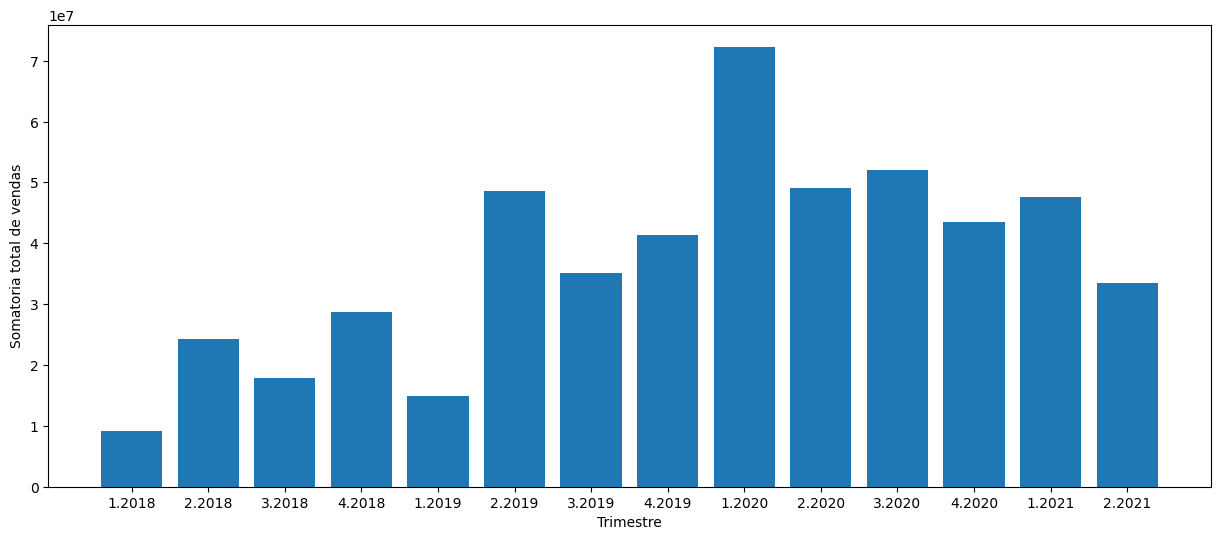

In [16]:
import matplotlib.pyplot as plt
trimestre = dados[['Valores']].copy()
trimestre['Data'] = pd.to_datetime(dados['Data da Venda'], format='%d/%m/%Y')
trimestre['Trimestre'] = trimestre['Data'].dt.quarter
trimestre['Ano'] = trimestre['Data'].dt.year
grafico = trimestre.groupby(['Ano', 'Trimestre'])['Valores'].sum().reset_index()
plt.figure(figsize=(15,6))
plt.bar(grafico.index, grafico['Valores'],
tick_label=grafico['Trimestre'].astype(str) + '.' + grafico['Ano'].astype(str))
plt.xlabel('Trimestre')
plt.ylabel('Somatoria total de vendas')